# QUESTO PER ORA È IL MODELLO MIGLIORE:
- INPUT SHAPE 150x150

Modello:

- model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 1)))
- model.add(MaxPooling2D(2, 2))
- model.add(Dropout(0.2))
- model.add(Conv2D(64, (3, 3), activation='relu'))
- model.add(MaxPooling2D(2, 2))
- model.add(Dropout(0.2))
- model.add(Conv2D(32, (3, 3), activation='relu'))
- model.add(MaxPooling2D(2, 2))
- model.add(Dropout(0.2))
- model.add(Flatten())
- model.add(Dense(256, activation='relu'))
- model.add(Dense(5, activation='softmax')) 

In [8]:
#importing libraries
import tqdm
from tqdm import tqdm
import os
from PIL import Image
import numpy as np


## MODEL BUILDING

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.regularizers import l1, l2 #regularizers per togliere oscillazioni 

In [10]:
model = Sequential() #initializing model

In [11]:
#ADDING THE LAYERS 
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 1), kernel_regularizer=l1, l2(0.001)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1, l2(0.001)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1, l2(0.001)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu',  kernel_regularizer=l1, l2(0.001)))
model.add(Dense(5, activation='softmax'))

/Users/joshuabrauner/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

In [13]:
#compiling the model
model.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ TruePositives(name='tp'), 
                         FalsePositives(name='fp'), 
                         TrueNegatives(name='tn'), 
                         FalseNegatives(name='fn'), 
                         "accuracy", 
                         Precision(name='precision'), 
                         Recall(name='recall'), 
                         AUC(name='auc')])

In [14]:
#display the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,632,869 (21.49 MB)

 Trainable params: 5,632,869 (21.49 MB)

 Non-trainable params: 0 (0.00 B)

# SPLITTING IN TRAIN AND TEST SET

In [15]:
#TRAIN E TEST SPLIT 
import os
import shutil
from sklearn.model_selection import train_test_split

# Assume `base_dir` is the path to the directory containing your 5 label subdirectories.
base_dir = '/Users/joshuabrauner/Desktop/Image classification/LABELLED IMAGES'
labels = ['Advertisements', 'E-mail', 'Handwritten Documents', 'Other', 'Resumé']
file_paths = []
file_labels = []

# Create a list of file paths and labels
for label in labels:
    folder_path = os.path.join(base_dir, label)
    files = os.listdir(folder_path)
    for file in files:
        file_paths.append(os.path.join(folder_path, file))
        file_labels.append(label)

# Split the data
train_paths, test_paths, train_labels, test_labels = train_test_split(
    file_paths, 
    file_labels, 
    test_size=0.2, 
    stratify=file_labels
)

# Function to copy files to a new directory structure
def copy_files(file_paths, file_labels, dest_base_dir):
    for path, label in zip(file_paths, file_labels):
        # Create subdirectory with `label`
        dest_dir = os.path.join(dest_base_dir, label)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        # Copy file to the new directory
        shutil.copy(path, dest_dir)

# Define your new training and testing directories
train_dir = '/Users/joshuabrauner/Desktop/Image classification/Train directory'
test_dir = '/Users/joshuabrauner/Desktop/Image classification/Test directory'

# Copy the files to the new directories
copy_files(train_paths, train_labels, train_dir)
copy_files(test_paths, test_labels, test_dir)


In [16]:
# Define your training and testing directories
train_dir = '/Users/joshuabrauner/Desktop/Image classification/Train directory'
test_dir = '/Users/joshuabrauner/Desktop/Image classification/Test directory'

def count_files(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Conteggio delle immagini nelle directory di training e test
num_train_images = count_files(train_dir)
num_test_images = count_files(test_dir)

print(f"Total training images: {num_train_images}")
print(f"Total testing images: {num_test_images}")

Total training images: 1953
Total testing images: 490


# TRAINING THE MODEL

In [17]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

In [18]:
# Define the callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [20]:
# Define the parameters for image data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255, # Normalize image pixel values
    horizontal_flip=True, # Randomly flip images horizontally
    validation_split=0.1, # Allocate 10% of images for validation
    shear_range=0.2, # Random shearing
    zoom_range=0.2, # Random zoom
    fill_mode='nearest', # Pixel fill mode
    cval=0.0 # Value for points outside the boundaries
)
# Assuming your training images are sorted in subdirectories within 'tiff_kaggle' directory
train_directory = '/Users/joshuabrauner/Desktop/Image classification/Train directory'

# Define the training generator
train_generator = datagen.flow_from_directory(
    directory=train_directory,  # path to the directory with training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'  # set as training data
)

# Define the validation generator
validation_generator = datagen.flow_from_directory(
    directory=train_directory,  # path to the directory with training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'  # set as validation data
)

Found 1760 images belonging to 5 classes.
Found 193 images belonging to 5 classes.


In [21]:
# Add the callback to your fit function
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[reduce_lr]
)

Epoch 1/20


/Users/joshuabrauner/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3074 - auc: 0.5989 - fn: 864.2500 - fp: 74.3929 - loss: 3.1816 - precision: 0.3769 - recall: 0.0726 - tn: 3571.3215 - tp: 47.1786 - val_accuracy: 0.3731 - val_auc: 0.6859 - val_fn: 193.0000 - val_fp: 0.0000e+00 - val_loss: 2.1157 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 772.0000 - val_tp: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4204 - auc: 0.7395 - fn: 713.8929 - fp: 77.1964 - loss: 1.8580 - precision: 0.6747 - recall: 0.1811 - tn: 3568.5178 - tp: 197.5357 - val_accuracy: 0.5959 - val_auc: 0.8695 - val_fn: 116.0000 - val_fp: 17.0000 - val_loss: 1.4491 - val_precision: 0.8191 - val_recall: 0.3990 - val_tn: 755.0000 - val_tp: 77.0000 - learning_rate: 0.0010
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6794 - auc: 0.8955 - fn: 434.9464 - fp: 113.6071 - loss: 1.2921 - precision: 0.8056 - recall: 0.4895 - tn: 3532.1072 - tp: 476.4821 - val

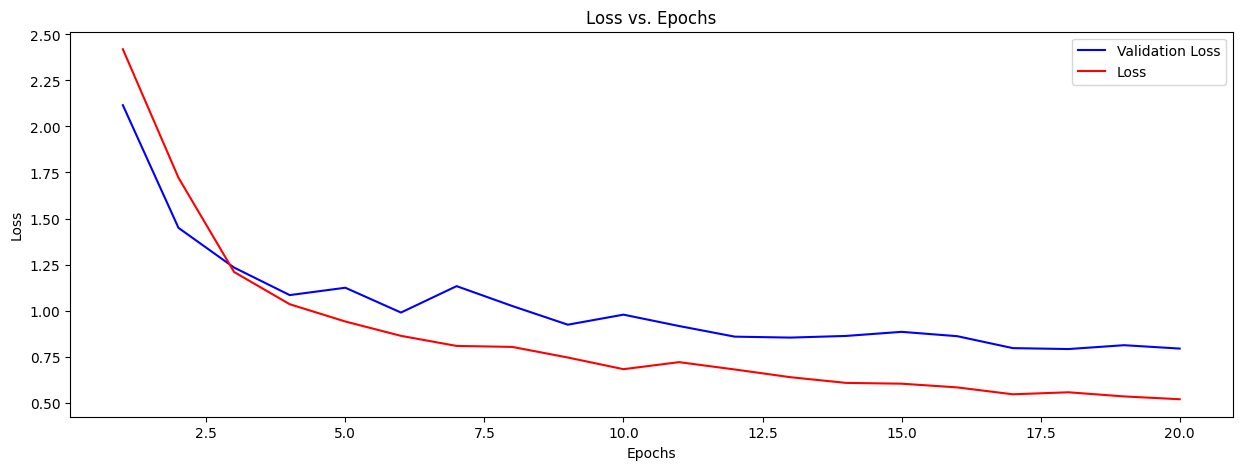

In [22]:
# Plot the history
# Extracting the loss on the validation set
val_loss = history.history['val_loss']
loss = history.history['loss']

# Extracting the number of epochs
epochs = range(1, len(val_loss) + 1)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.plot(epochs, loss, 'r-', label='Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

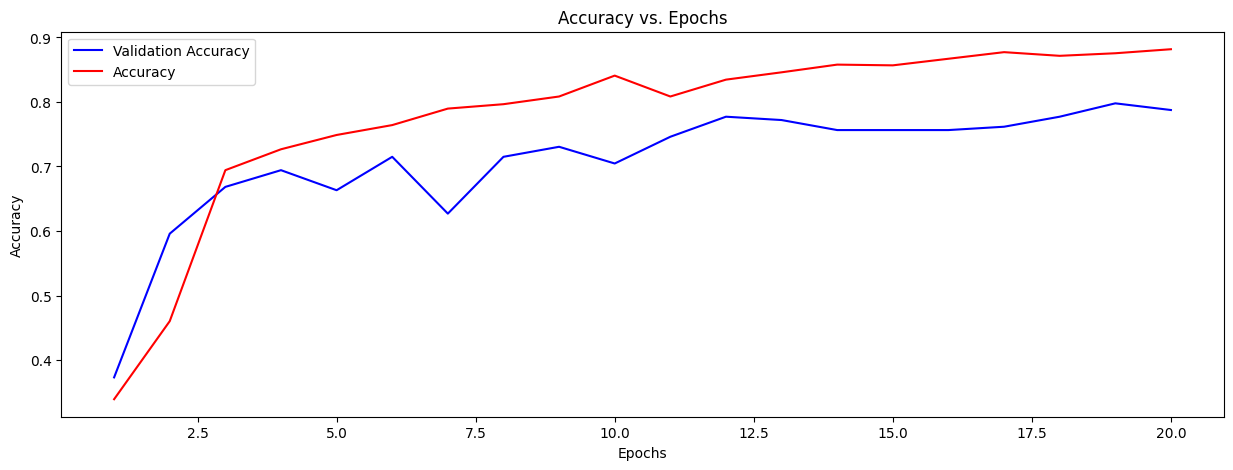

In [23]:
#accuracy
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.figure(figsize=(15, 5))
plt.plot(epochs,val_accuracy , 'b-', label='Validation Accuracy')
plt.plot(epochs, accuracy, 'r-', label='Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

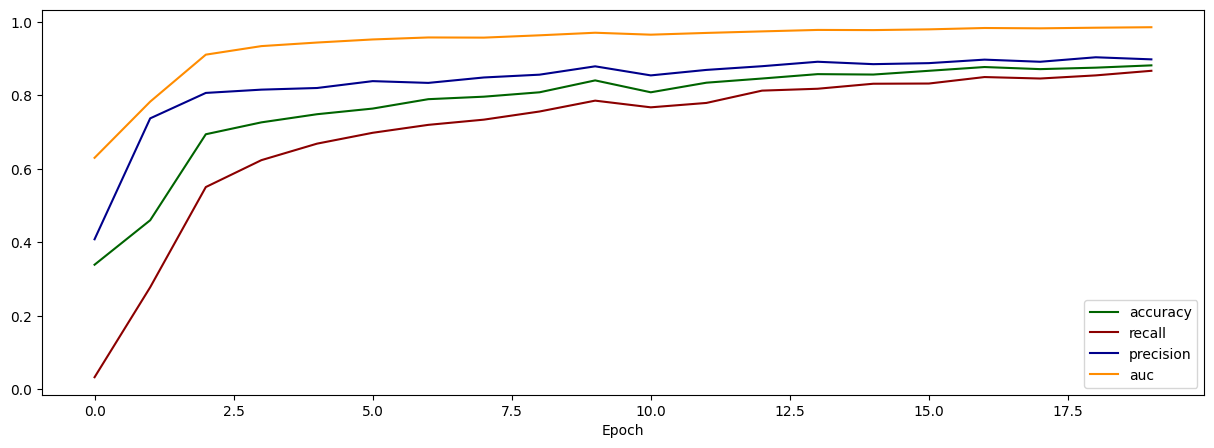

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(history.history['accuracy'], "darkgreen", label= "accuracy")
plt.plot(history.history['recall'], "darkred", label= "recall")
plt.plot(history.history['precision'], "darkblue", label= "precision")
plt.plot(history.history['auc'], "darkorange", label= "auc")
plt.xlabel('Epoch')
plt.legend()

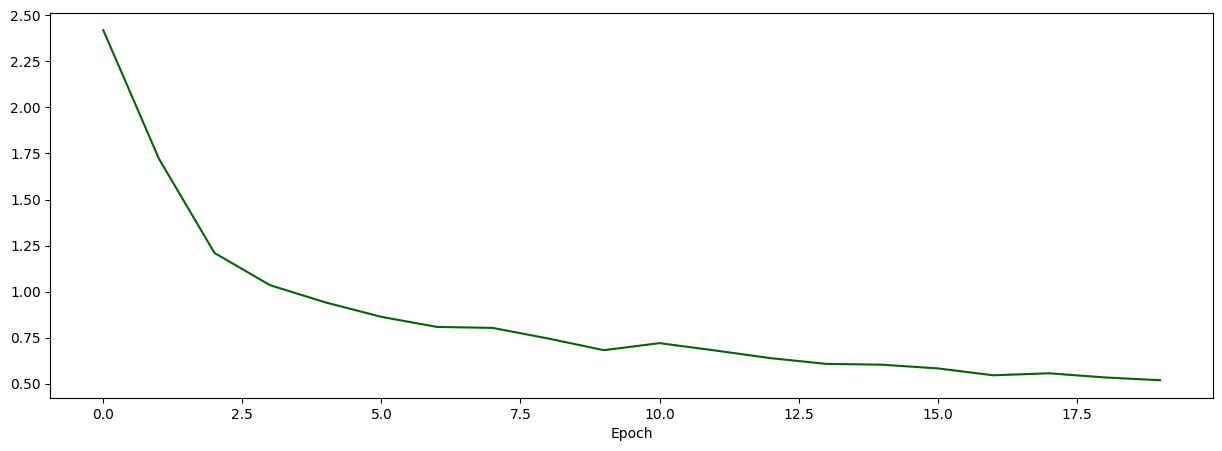

In [25]:
plt.figure(figsize = (15, 5))
plt.plot(history.history['loss'], "darkgreen", label= "accuracy")
plt.xlabel('Epoch')
plt.show()

In [26]:
#saving the model
model.save("CNN_team5.h5")

In [ ]:
from 

In [29]:
#loading the model
model = load_model("CNN_team5.h5")

## MODEL EVALUATION

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  # Assumi che il preprocessing sia solo una normalizzazione

test_generator = test_datagen.flow_from_directory(
    "/Users/joshuabrauner/Desktop/Image classification/Test directory",  # Percorso della cartella contenente le immagini di test
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',  # Assumi che le immagini siano in scala di grigi
    shuffle=False)

Found 489 images belonging to 5 classes.


In [31]:
# Evaluation of the model on the test set
results = model.evaluate(test_generator)
test_loss = results[0]  # Loss is the first value
test_acc = results[1]  # Accuracy is the second value

# Assuming you have additional metrics beyond accuracy, you can capture them like this:
test_auc = results[2]  # AUC is the third value
test_fn = results[3]  # False Negatives is the fourth value
test_fp = results[4]  # False Positives is the fifth value

# Now, you can print them all
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
print(f"Test AUC: {test_auc}")
print(f"Test False Negatives: {test_fn}")
print(f"Test False Positives: {test_fp}")


/Users/joshuabrauner/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - accuracy: 0.8091 - auc: 0.9509 - fn: 73.2353 - fp: 46.4118 - loss: 0.8282 - precision: 0.8385 - recall: 0.7662 - tn: 1087.2354 - tp: 210.1765
Test Loss: 0.8277629613876343
Test Accuracy: 368.0
Test AUC: 77.0
Test False Negatives: 1879.0
Test False Positives: 121.0


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming test_generator is properly defined and is the test data generator
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# The true class labels
true_classes = test_generator.classes

# Get the class labels from the generator (for a more readable classification report)
class_labels = list(test_generator.class_indices.keys())

# Calculate the confusion matrix
print(confusion_matrix(true_classes, predicted_classes))

# Calculate the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step
[[ 74   0   0   2   0]
 [  5  38   6  20   1]
 [ 12   0  93   0   0]
 [ 16   2  10  25   3]
 [  7   0   9   6 160]]
                       precision    recall  f1-score   support

       Advertisements       0.65      0.97      0.78        76
               E-mail       0.95      0.54      0.69        70
Handwritten Documents       0.79      0.89      0.83       105
                Other       0.47      0.45      0.46        56
               Resumé       0.98      0.88      0.92       182

             accuracy                           0.80       489
            macro avg       0.77      0.75      0.74       489
         weighted avg       0.82      0.80      0.80       489



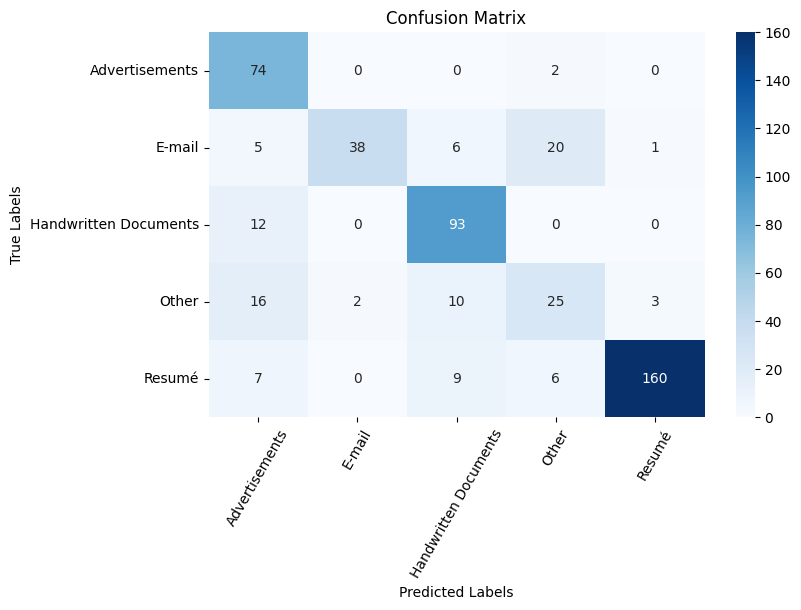

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'true_classes' and 'predicted_classes' are available
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=60)
plt.show()

## Continue with evaluation but first reset test generator

In [35]:
# Reset the test_generator before making predictions to ensure alignment
test_generator.reset()

# Predict the classes with the model
predictions = model.predict(test_generator, verbose=1)

# Get the class indices with the highest probability for each prediction
predicted_classes_indices = np.argmax(predictions, axis=1)

# Get the true class indices from the generator
true_classes = test_generator.classes

# Get the class labels for a better readability in the classification report
class_labels = list(test_generator.class_indices.keys())

# Compare predicted and true class indices
count_true = np.sum(predicted_classes_indices == true_classes)
count_false = len(true_classes) - count_true

# Calculate the error rate
error_rate = count_false / len(true_classes)

# Print the results
print("Number of successes:", count_true)
print("Number of errors:", count_false)
print("Error rate:", error_rate)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 337ms/step
Number of successes: 390
Number of errors: 99
Error rate: 0.20245398773006135


Index: 26, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 8, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 29, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 10, Predicted: 3, True: [1. 0. 0. 0. 0.]
Index: 20, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 17, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 25, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 7, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 19, Predicted: 0, True: [1. 0. 0. 0. 0.]
Index: 21, Predicted: 0, True: [1. 0. 0. 0. 0.]


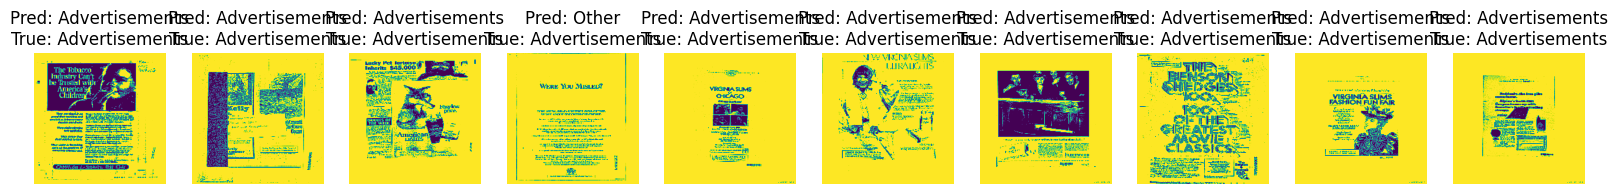

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_predictions(generator, predicted_classes, class_labels, n=10):
    """ Plot a random selection of images with their predictions and true labels. """
    images, true_labels = next(generator)
    if len(images) > len(predicted_classes):
        raise ValueError("The number of predicted classes does not match the number of loaded images")
    
    indices = np.random.choice(len(images), n, replace=False)
    plt.figure(figsize=(2*n, 4))
    for i, index in enumerate(indices):
        # Debugging output
        print(f"Index: {index}, Predicted: {predicted_classes[index]}, True: {true_labels[index]}")
        pred_label = class_labels[predicted_classes[index]]
        true_label = class_labels[np.argmax(true_labels[index])]
        
        plt.subplot(1, n, i + 1)
        plt.imshow(images[index])
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}')
        plt.axis('off')
    plt.show()

# Example usage
plot_sample_predictions(test_generator, predicted_classes, class_labels)

In [37]:
# Make sure the generator does not shuffle data to maintain the order
test_generator.shuffle = False
test_generator.batch_size = 1  # Set batch size to 1 to get predictions one by one

# Reset the generator to be sure to start from the beginning
test_generator.reset()

# Predict the classes with the model for the number of samples you want
# If you want to test a subset, replace 'len(test_generator)' with the number of samples you want
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Get the class indices with the highest probability for each prediction
predicted_classes_indices = np.argmax(predictions, axis=1)

# Get the true class indices from the generator
true_classes = test_generator.classes

# Get the class labels for a better readability
class_labels = list(test_generator.class_indices.keys())

# Iterate over each prediction and true class
for i, (pred_idx, true_idx) in enumerate(zip(predicted_classes_indices, true_classes)):
    # Get the predicted label and true label using their indices
    predicted_label = class_labels[pred_idx]
    true_label = class_labels[true_idx]
    
    # Determine if the prediction is correct
    result = "True" if predicted_label == true_label else "False"
    
    # Print the information
    print(f"Prediction: {predicted_label} | Real class: {true_label} | Result: {result}")


489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Other | Real class: Advertisements | Result: False
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Advertisements | Result: True
Prediction: Advertisements | Real class: Ad

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


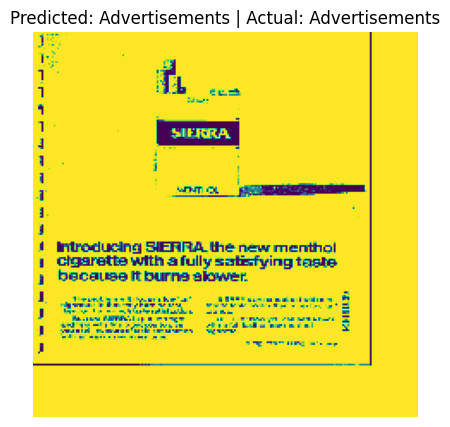

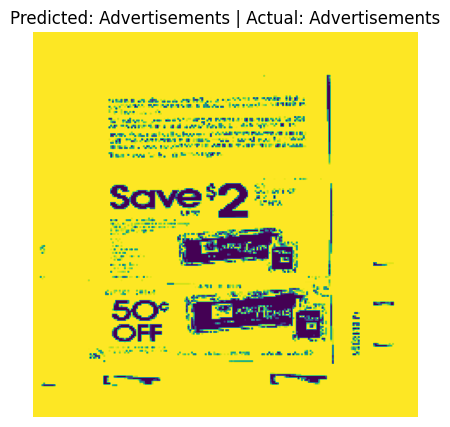

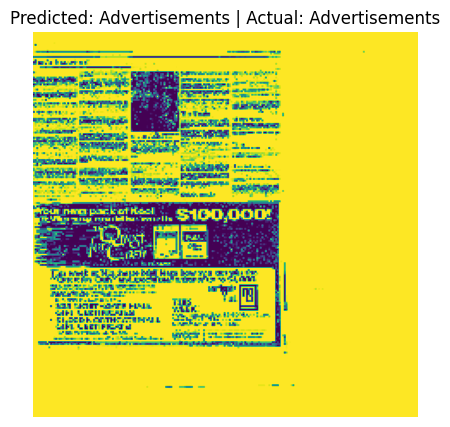

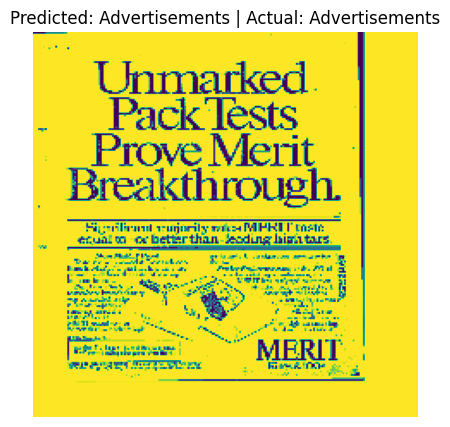

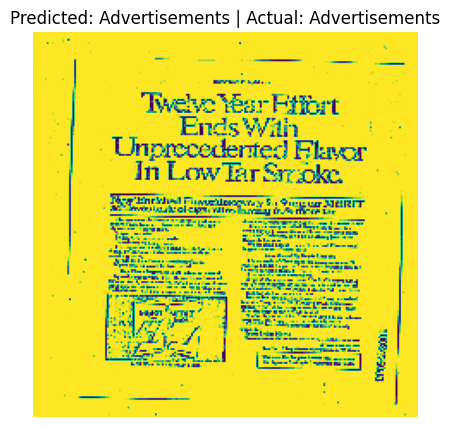

In [54]:
# Set the generator for the test dataset
test_generator.shuffle = False
test_generator.batch_size = 1
test_generator.reset()

# Predict the first 5 images
predictions = model.predict(test_generator, steps=5)

# Retrieve predicted class indices and actual classes
predicted_classes_indices = np.argmax(predictions, axis=1)
true_classes = test_generator.classes[:5]  # Assuming true classes are ordered

# Get class labels for better readability
class_labels = list(test_generator.class_indices.keys())

# Display the images with predicted and actual labels
for i in range(5):
    plt.figure(figsize=(5, 5))
    # Extract image
    img = test_generator[i][0][0]  # Adjust if needed based on generator output format
    predicted_label = class_labels[predicted_classes_indices[i]]
    true_label = class_labels[true_classes[i]]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label} | Actual: {true_label}')
    plt.axis('off')
    plt.show()